# Q1

For small values of n, variance of Y will be larger, but as n becomes greater, the difference reduces.

# Q2

1. Posterior Distribution
2. Starting value from the prior distributions
3. Proposal from Truncated normal(2,inf) and normal Distribution.
4. Calculating Alpha
5. Draw U from Uniform Distribution
6. If U < Alpha, then update the values.


In [5]:
using Random, Distributions
using Printf
using Distances
using SpecialFunctions
using Expectations
using Plots
using StatsPlots

In [6]:
function posterior(Y,u,v,n,a,b)         # Posterior Distribution
    f = pdf(truncated(Gamma(a,b),lower = 2),v)*pdf(TDist(v),u)
    for i in 1:n
        f = f*exp(-0.5*(Y[i]-u)^2)
    end
    return f
end

function metro_hast(Y,n,a,b)
    
    v = rand(truncated(Gamma(a,b),lower = 2)) #initial value
    u = rand(TDist(v))                        #initial value
    v_sample = AbstractFloat[v]
    u_sample = AbstractFloat[u]

    for i in 1:10000
        v0 = rand(truncated(Normal(v,1),lower = 2)) # Proposal from Truncated Normal with same support as prior.
        u0 = rand(Normal(u,1))   # Symmetric Proposal from Normal Distr.
        
        alpha = min(1,(posterior(Y,u0,v0,n,a,b)/posterior(Y,u,v,n,a,b))*pdf(truncated(Normal(v0,1),lower = 2),v)/pdf(truncated(Normal(v,1),lower = 2),v0))
        # Multiplying alpha by *pdf(truncated(Normal(v0,1),lower = 2),v)/pdf(truncated(Normal(v,1),lower = 2),v0)
        # as the truncated normal distribution is not symmetric
        U = rand(Uniform())
        if(U<alpha)
            v = v0
            u = u0
        end
        
        append!(v_sample, v)
        append!(u_sample, u)
    end
    
    return v_sample,u_sample
    
end




metro_hast (generic function with 1 method)

In [7]:
function Y_gen(n,a,b)
    Y = AbstractFloat[]
    for i in 1:n
        v = rand(truncated(Gamma(a,b),lower = 2)) 
        u = rand(TDist(v))
        append!(Y, rand(Normal(u,1)))
    end
    return Y
end
        

Y_gen (generic function with 1 method)

In [8]:
n = 100
a = 2
b = 0.1
Y = Y_gen(n,a,b)
v,u = metro_hast(Y,n,a,b)

(AbstractFloat[2.1133986982183193, 2.1133986982183193, 2.6494702543895357, 3.7961857292098715, 3.7961857292098715, 3.7961857292098715, 3.2356776555488524, 3.2356776555488524, 3.2356776555488524, 3.2356776555488524  …  2.3327704345734634, 2.3327704345734634, 2.3327704345734634, 2.3327704345734634, 2.3327704345734634, 2.3327704345734634, 2.3327704345734634, 2.3327704345734634, 2.3327704345734634, 2.3327704345734634], AbstractFloat[-1.6553448886749114, -1.6553448886749114, -1.029399879129884, -0.2650237037889952, -0.2650237037889952, -0.2650237037889952, -0.4106217802875862, -0.4106217802875862, -0.4106217802875862, -0.4106217802875862  …  -0.14812887622023152, -0.14812887622023152, -0.14812887622023152, -0.14812887622023152, -0.14812887622023152, -0.14812887622023152, -0.14812887622023152, -0.14812887622023152, -0.14812887622023152, -0.14812887622023152])

In [9]:
v[10000]

2.3327704345734634

In [10]:
u[10000]

-0.14812887622023152

In [11]:
mean(v)

2.1264074377053257

In [12]:
mean(u)

-0.20110531114669003

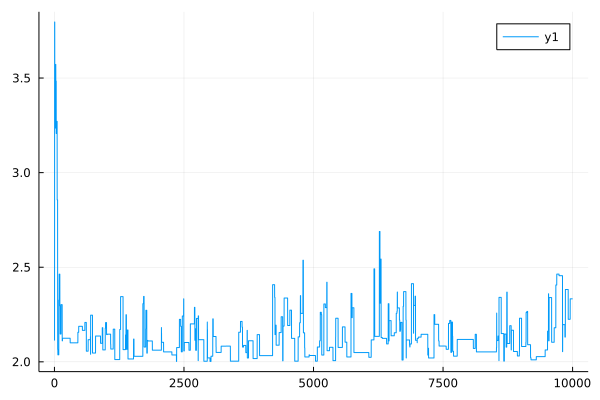

In [13]:
plot(v)

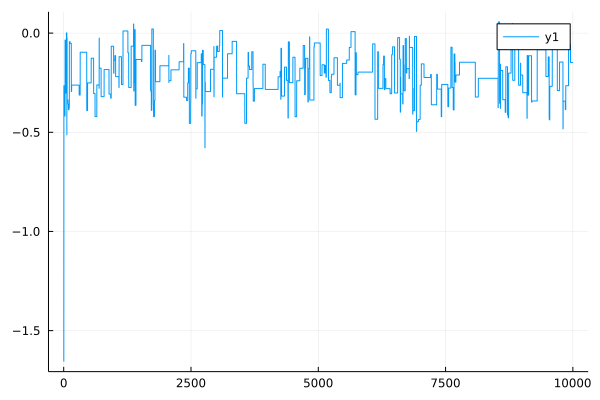

In [14]:
plot(u)

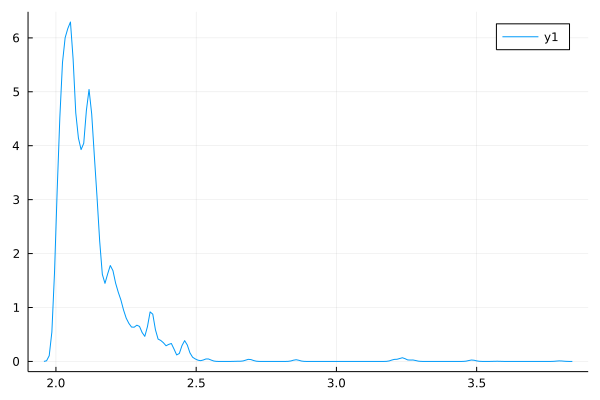

In [15]:
density(v)

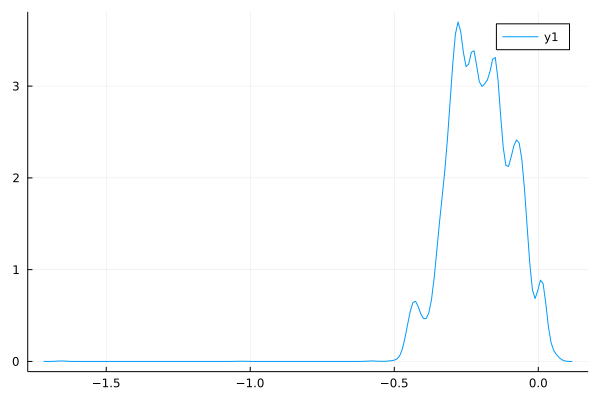

In [16]:
density(u)

# Q3